In [1]:
%matplotlib inline

In [2]:
from nilearn import plotting
from nilearn._utils.niimg_conversions import _index_img
import matplotlib.pyplot as plt

### Import functions

In [3]:
import volumetric_layering

### Inputs

In [4]:
lut_dir = '/home/julia/workspace/cbstools/lookuptables/'
data_dir = '/SCR/data/demo/'

gwb_prob = data_dir + 'adult_F04_intern_orig_binmask.nii.gz'
cgb_prob = data_dir + 'adult_F04_extern_orig_binmask.nii.gz'
intensity = data_dir + 'F04_01032013_MSME_TEsum_magn_initial.nii'
mesh = data_dir + 'adult_F04__surf_2-2.vtk'

In [5]:
coords = (-5, -2, 1)
n_layers = 5

### Simplest input: tissue classification

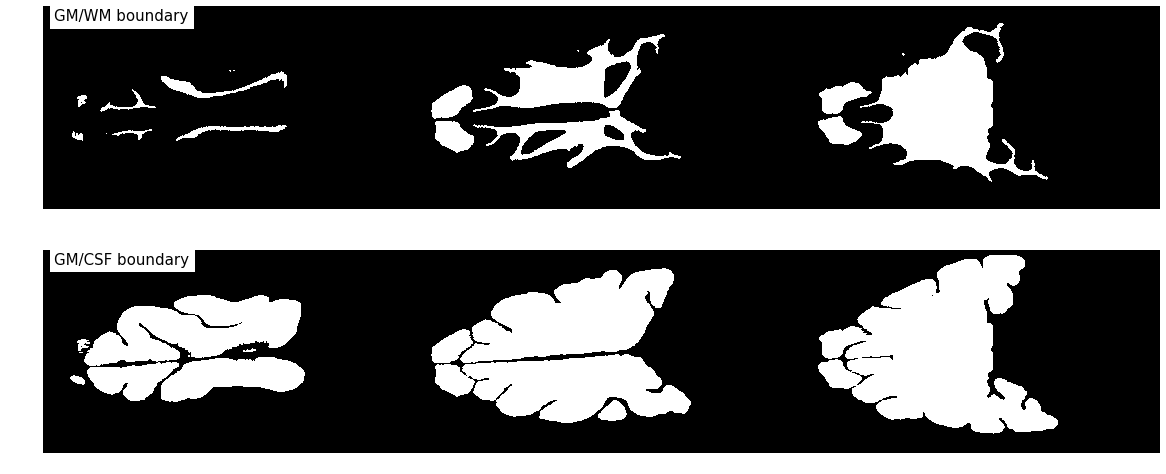

In [6]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Transforming to levelsets

In [7]:
gwb = volumetric_layering.create_levelsets(gwb_prob, base_name=data_dir+'gwb')

In [8]:
cgb = volumetric_layering.create_levelsets(cgb_prob, base_name=data_dir+'cgb')

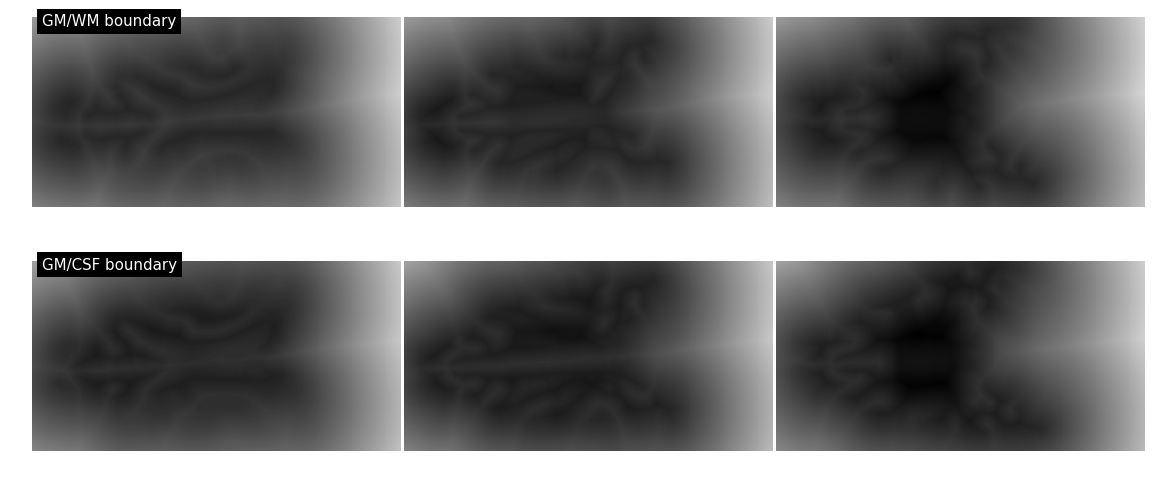

In [9]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Finding equivolumetric layers

In [10]:
depth, layers, boundaries = volumetric_layering.layering(gwb, cgb, lut_dir, n_layers=n_layers, 
                                                         base_name=data_dir+'layering')

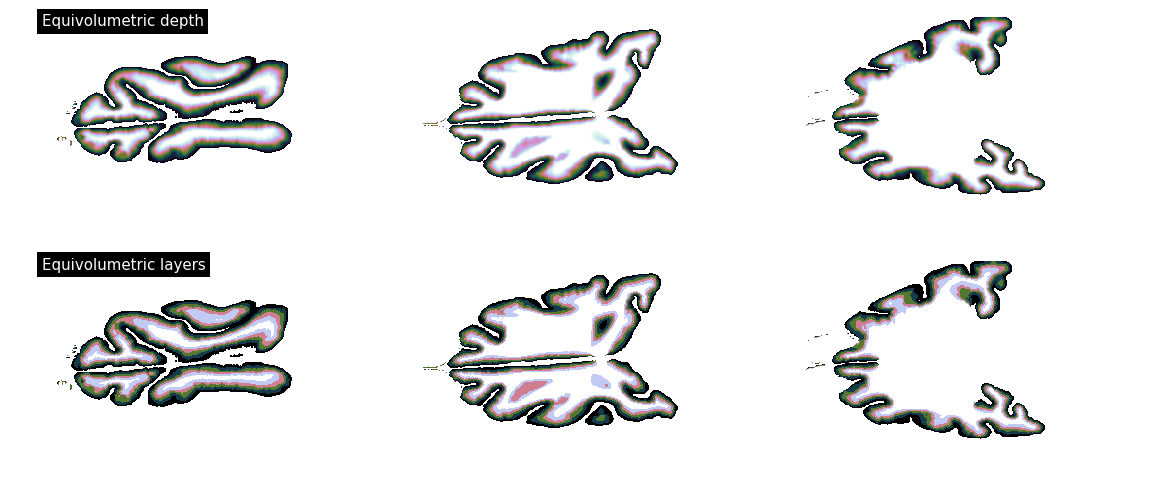

In [11]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_img(depth, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='Equivolumetric depth', cmap='cubehelix_r')
ax2=fig.add_subplot(212)
plotting.plot_img(layers, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='Equivolumetric layers', cmap='cubehelix_r', vmin=0, vmax=5)

### Sampling intensity on layers

In [12]:
profiles = volumetric_layering.profile_sampling(boundaries, intensity, base_name=data_dir+'profile_volume')

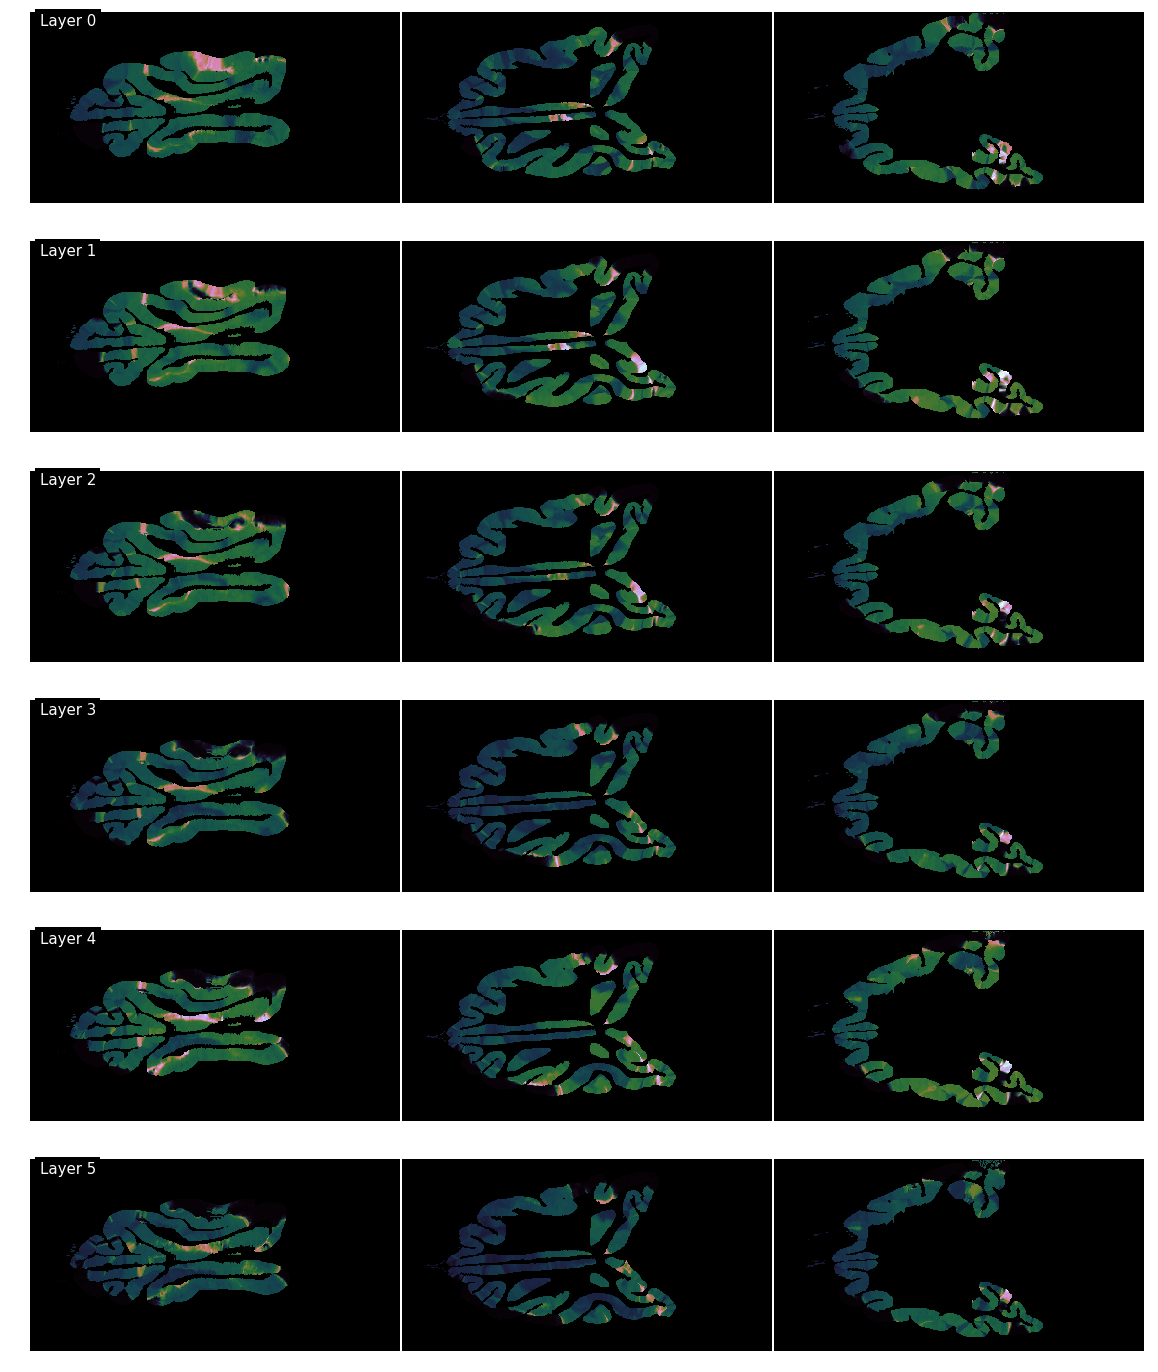

In [13]:
fig=plt.figure(figsize=(20,(n_layers+1)*4));
for i in range(n_layers+1):
    ax=fig.add_subplot(n_layers+1,1,i+1)
    plotting.plot_img(_index_img(profiles, i), annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                       figure=fig, axes=ax, title='Layer %s'%str(i), cmap='cubehelix', black_bg=False)

### If you are more into meshes

In [14]:
profile_meshes = volumetric_layering.profile_meshing(profiles, mesh, base_name=data_dir+'profile_meshes')

/usr/local/lib/python2.7/dist-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


### Look at your mesh --> thanks to Anisha!

In [15]:
from nbpapaya import Surface

In [16]:
Surface(data_dir+'profile_meshes_3.vtk')

doing checks /home/julia/.jupyter/custom/
{'tmp8PQjaD.vtk': 'papaya_data/tmp8PQjaD.vtk'}
